Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:
## 1.

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [84]:
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats
import statistics
# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

#import data
from wrangle import wrangle_zillow
import wrangle
import env

In [2]:
sql = """SELECT
  *
FROM properties_2017
LEFT JOIN predictions_2017 AS pe USING (parcelid)
LEFT JOIN architecturalstyletype AS arch USING (architecturalstyletypeid)
LEFT JOIN propertylandusetype USING (propertylandusetypeid)
LEFT JOIN airconditioningtype USING (airconditioningtypeid)
LEFT JOIN typeconstructiontype USING (typeconstructiontypeid)
LEFT JOIN storytype USING (storytypeid)
LEFT JOIN unique_properties USING (parcelid)
LEFT JOIN heatingorsystemtype USING (heatingorsystemtypeid)
WHERE propertylandusetype.propertylandusedesc = 'Single Family Residential'
AND pe.transactiondate LIKE '2017%%';
    
    """


In [5]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    
    '''
    This function uses my
    info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'


In [6]:
def get_zillow_data():
    '''
    This function reads the titanic data from the Codeup db into a df.
    '''
    # Create SQL query.
    sql_query = 'SELECT * FROM passengers'
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql, get_connection('zillow'))
    
    return df

In [7]:
df = get_zillow_data()

In [8]:
#calling in data

#removing un-needed columns
cols_to_remove = ['heatingorsystemtypeid','parcelid','storytypeid','typeconstructiontypeid','airconditioningtypeid','propertylandusetypeid','architecturalstyletypeid','id','buildingclasstypeid','buildingqualitytypeid','decktypeid','pooltypeid10','pooltypeid2','pooltypeid7','taxamount','taxdelinquencyflag','taxdelinquencyyear','id']
df = wrangle.remove_columns(df, cols_to_remove)


df = wrangle.handle_missing_values(df)

df.head()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,censustractandblock,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc
0,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,...,1998.0,485713.0,1023282.0,2016.0,537569.0,6.059063e+13,0.025595,2017-01-01,Single Family Residential,None
1,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,...,1967.0,88000.0,464000.0,2016.0,376000.0,6.111001e+13,0.055619,2017-01-01,Single Family Residential,None
2,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,...,1962.0,85289.0,564778.0,2016.0,479489.0,6.059022e+13,0.005383,2017-01-01,Single Family Residential,None
3,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,...,1970.0,108918.0,145143.0,2016.0,36225.0,6.037300e+13,-0.103410,2017-01-01,Single Family Residential,Central
4,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,...,1950.0,276684.0,773303.0,2016.0,496619.0,6.037461e+13,-0.001011,2017-01-01,Single Family Residential,Central


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52375 entries, 0 to 52440
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   52375 non-null  float64
 1   bedroomcnt                    52375 non-null  float64
 2   calculatedbathnbr             52304 non-null  float64
 3   calculatedfinishedsquarefeet  52359 non-null  float64
 4   finishedsquarefeet12          52194 non-null  float64
 5   fips                          52375 non-null  float64
 6   fullbathcnt                   52304 non-null  float64
 7   latitude                      52375 non-null  float64
 8   longitude                     52375 non-null  float64
 9   lotsizesquarefeet             52015 non-null  float64
 10  propertycountylandusecode     52375 non-null  object 
 11  propertyzoningdesc            33836 non-null  object 
 12  rawcensustractandblock        52375 non-null  float64
 13  r

In [10]:
df.isnull().sum()

bathroomcnt                         0
bedroomcnt                          0
calculatedbathnbr                  71
calculatedfinishedsquarefeet       16
finishedsquarefeet12              181
fips                                0
fullbathcnt                        71
latitude                            0
longitude                           0
lotsizesquarefeet                 360
propertycountylandusecode           0
propertyzoningdesc              18539
rawcensustractandblock              0
regionidcity                     1031
regionidcounty                      0
regionidzip                        23
roomcnt                             0
unitcnt                         18528
yearbuilt                          50
structuretaxvaluedollarcnt         75
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
censustractandblock               114
logerror                            0
transactiondate                     0
propertyland

In [11]:
from sklearn.model_selection import train_test_split

def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on taxvaluedollarcnt.
    return train, validate, test DataFrames.
    '''


    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify = df.fips)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123)
    return train, validate, test

train, validate, test = split_data(df)

## Questions:

1. What is the distribution of each variable?
2. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
3. Is logerror different between number of baths vs bedroom vs squarefeet?
4. Is logerror different when it comes to lotsize?
5. Does logerror match/relate to taxvaluedollar amount?

## 1. What is the distribution of each variable?

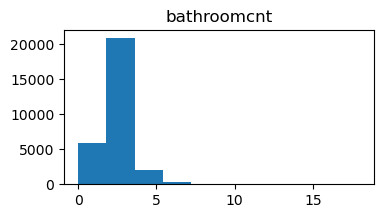

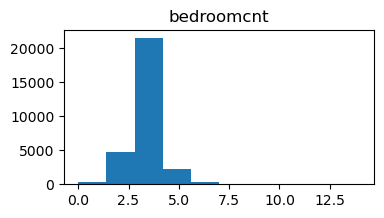

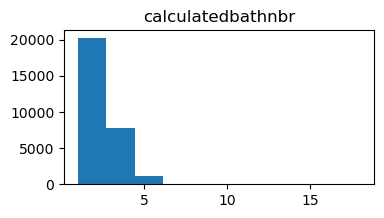

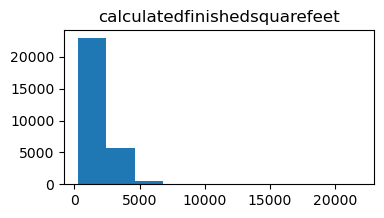

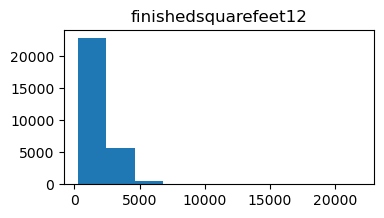

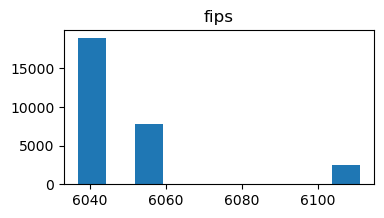

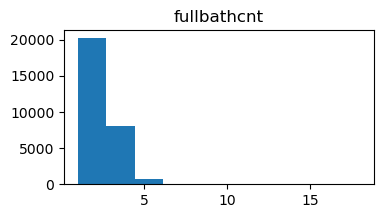

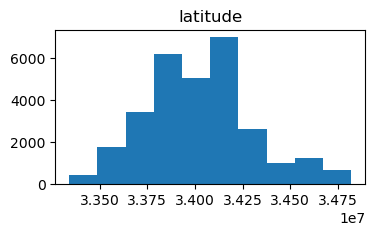

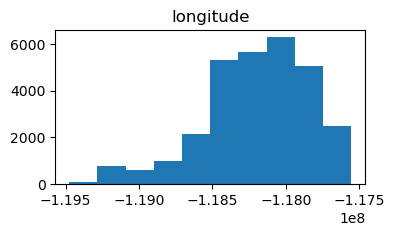

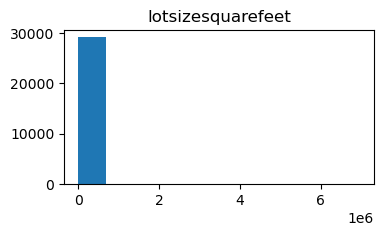

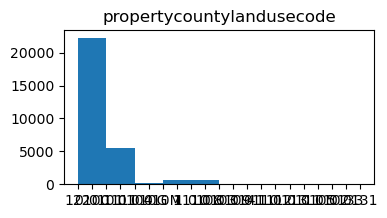

TypeError: '<=' not supported between instances of 'NoneType' and 'NoneType'

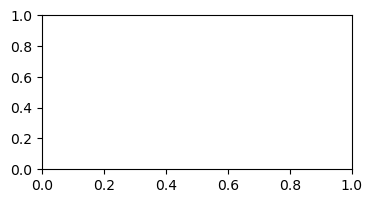

In [12]:
#create all the histograms:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

## Conclusion:
Mostly normally distributed: bedroomcnt, yearbuilt
Skewed right: transactiondate, regionidcity,propertyzoningdesc,latitude,fullbathcnt,finishedsqft,calculatedbathbr,bathcnt

## 2. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [13]:
train.fips.value_counts()

6037.0    18992
6059.0     7861
6111.0     2477
Name: fips, dtype: int64

6037 = Los Angeles County
6059 = Orange County
6111 = Ventura County

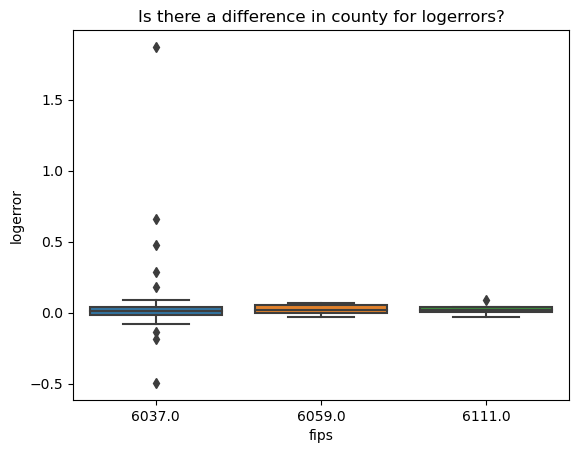

In [14]:
#plotting fips to logerror
sample = train.sample(50)
sns.boxplot(sample.fips, sample.logerror)
plt.title("Is there a difference in county for logerrors?")
plt.show()

In [41]:
#rename columns:
def one_hot_encode(train):
    train['is_Los_Angeles'] = train.fips == 6037.0
    return train

one_hot_encode(train)

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,censustractandblock,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc,is_Los_Angeles
33280,4.0,5.0,4.0,3329.0,3329.0,6059.0,4.0,33559283.0,-117694244.0,5500.0,...,443036.0,1352000.0,2016.0,908964.0,6.059042e+13,0.112788,2017-06-22,Single Family Residential,None,False
10940,3.0,4.0,3.0,2728.0,2728.0,6059.0,3.0,33896471.0,-117961310.0,6380.0,...,194878.0,800250.0,2016.0,605372.0,6.059002e+13,-0.034496,2017-03-10,Single Family Residential,None,False
38660,3.0,6.0,3.0,2000.0,2000.0,6059.0,3.0,33806530.0,-117965666.0,7192.0,...,117589.0,380019.0,2016.0,262430.0,6.059088e+13,-0.018956,2017-07-14,Single Family Residential,None,False
41136,1.0,2.0,1.0,900.0,900.0,6037.0,1.0,34109067.0,-118075654.0,5800.0,...,106203.0,455132.0,2016.0,348929.0,6.037480e+13,-0.161203,2017-07-26,Single Family Residential,Floor/Wall,True
25639,1.0,3.0,1.0,996.0,996.0,6037.0,1.0,34708886.0,-118141755.0,6014.0,...,86296.0,115738.0,2016.0,29442.0,6.037901e+13,-0.286603,2017-05-19,Single Family Residential,Floor/Wall,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19162,1.0,3.0,1.0,1144.0,1144.0,6037.0,1.0,34169000.0,-118283000.0,6280.0,...,107694.0,538475.0,2016.0,430781.0,6.037302e+13,-0.148739,2017-04-21,Single Family Residential,Floor/Wall,True
45339,3.0,3.0,3.0,2043.0,2043.0,6111.0,3.0,34213034.0,-118863825.0,10183.0,...,211765.0,605785.0,2016.0,394020.0,6.111007e+13,-0.018387,2017-08-16,Single Family Residential,None,False
22467,1.0,1.0,1.0,856.0,856.0,6037.0,1.0,33977476.0,-118284144.0,2202.0,...,67500.0,263400.0,2016.0,195900.0,6.037238e+13,-0.011034,2017-05-05,Single Family Residential,None,True
31201,2.0,3.0,2.0,1694.0,1694.0,6037.0,2.0,34658957.0,-118379263.0,NaN,...,112553.0,161253.0,2016.0,48700.0,NaN,0.012229,2017-06-14,Single Family Residential,Central,True


In [16]:
train["is_Los_Angeles"] = train["is_Los_Angeles"].astype(int)

In [17]:
stats.levene(train[train.is_Los_Angeles==0].logerror, 
             train[train.is_Los_Angeles==1].logerror)

LeveneResult(statistic=29.739547920685915, pvalue=4.9814962069025483e-08)

In [18]:
stats.ttest_ind(train[train.is_Los_Angeles==0].logerror, 
                train[train.is_Los_Angeles==1].logerror, 
                equal_var=False
               )

Ttest_indResult(statistic=4.318661010939725, pvalue=1.577778378407917e-05)

## 3. Is logerror different between number of baths vs bedroom vs squarefeet in LA?

In [19]:
train.bathroomcnt.value_counts()

2.0     12273
3.0      5943
1.0      5392
2.5      2185
4.0      1251
3.5       536
5.0       454
1.5       443
4.5       389
6.0       188
5.5       109
7.0        53
0.0        31
6.5        31
8.0        30
7.5         8
9.0         7
11.0        3
8.5         2
18.0        1
10.0        1
Name: bathroomcnt, dtype: int64

Is there a relationship
between bathroom count and logerror?


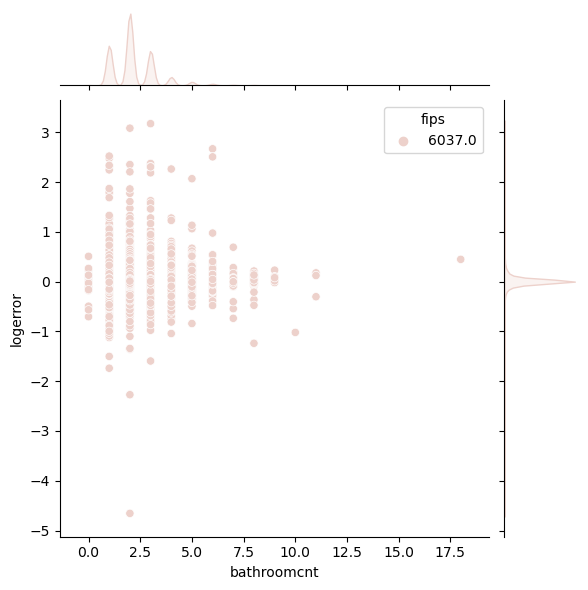

In [80]:

print("Is there a relationship\nbetween bathroom count and logerror?")
sns.jointplot(x="bathroomcnt", y="logerror", data=train[train.fips==6037.0], hue = 'fips')
plt.xlabel("Bathroomcnt")
plt.ylabel("Logerror")
plt.show()

In [81]:
stats.levene(train[train.is_Los_Angeles==1].bathroomcnt, 
             train[train.is_Los_Angeles==1].logerror.astype(int))

LeveneResult(statistic=12898.861848796003, pvalue=0.0)

Conclusion: There does seem to be a linear relationship between bathroom count and logerror


## Is logerror different when it comes to lotsize in LA?


Is there a relationship
between lot size and logerror?


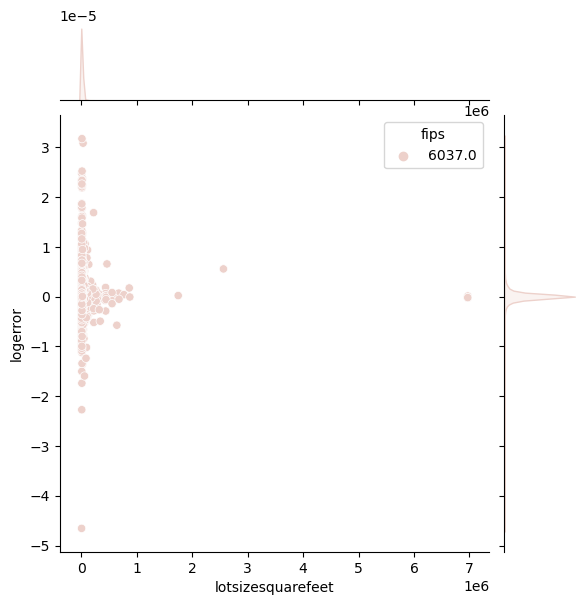

In [101]:
print("Is there a relationship\nbetween lot size and logerror?")

sns.jointplot(x="lotsizesquarefeet", y="logerror", data=train[train.fips==6037.0], hue = 'fips')
plt.xlabel("lotsizesquarefeet")
plt.ylabel("Logerror")
plt.show()

In [96]:
stats.levene(train[train.is_Los_Angeles==1].lotsizesquarefeet.fillna(value=train.lotsizesquarefeet.mean()), 
             train[train.is_Los_Angeles==1].logerror)

LeveneResult(statistic=97.1077714003146, pvalue=6.994033853736795e-23)

there seems to be a coorelation between lotsizesquarefeet and logerror in LA county.

## 5. Does logerror relate to taxvaluedollar amount? (in LA)

Is there a relationship
between Property Value and logerror?


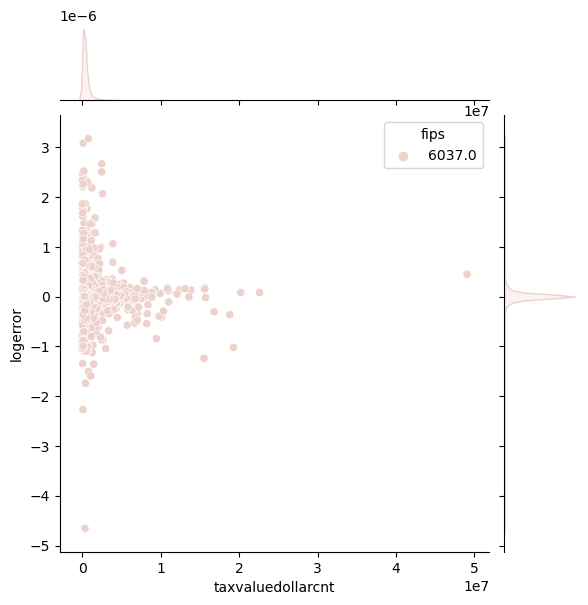

In [99]:
print("Is there a relationship\nbetween Property Value and logerror?")
sns.jointplot(x="taxvaluedollarcnt", y="logerror", data=train[train.fips==6037.0], hue = 'fips')
plt.xlabel("Property Value")
plt.ylabel("Logerror")
plt.show()

Conclusion:  There is a  linear relationship to Lot size and Log Error

In [75]:
stats.ttest_ind(train[train.is_Los_Angeles==1].taxvaluedollarcnt, 
                train[train.is_Los_Angeles==1].logerror, 
                equal_var=False)

Ttest_indResult(statistic=80.21302579285113, pvalue=0.0)

In [86]:
stats.levene(train[train.is_Los_Angeles==1].taxvaluedollarcnt, 
             train[train.is_Los_Angeles==1].logerror.astype(int))

LeveneResult(statistic=3216.5551614887804, pvalue=0.0)